 # 4 Modeling<a id='4_Modeling'></a>
 ___

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Modeling](#4_Modeling)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Train/Refit Selected Models](#4._Train_Refit_Selected_Models)
     * [4.5.1 Regression Model Training](#4.5.1_Regression_Model_Training)
     * [4.5.2 Classification Model Training](#4.5.2_Classification_Model_Training)
     * [4.5.3 Initial Predictions & Performance](#4.5.3_Initial_Predictions_&_Performance)
  * [4.6 Hyperparameter Tuning](#4.6_Hyperparameter_Tuning)
      * [4.6.1 RandomizedSearchCV](#4.6.1_RandomizedSearchCV)
          * [4.6.1.1_Gradient_Boosting_Regressor](#4.6.1.1_Gradient_Boosting_Regressor)
          * [4.6.1.Gradient_Boosting_Classifier](#4.6.1.2_Gradient_Boosting_Classifier)
      * [4.6.2 Bayesian Optimization](#4.6.2_Bayesian_Optimization)
          * [4.6.2.1_Gradient_Boosting_Classifier](#4.6.2.1_Gradient_Boosting_Classifier)
          * [4.6.2.2_Gradient_Boosting_Regressor](#4.6.2.2_Gradient_Boosting_Regressor)
      * [4.6.3 Performance Comparison](#4.6.3_Performance_Comparison)
      * [4.6.4 Best Params](#4.6.4_Best_Params)
  * [4.7 Victims in Social Services Context](#4.7_Victims_in_Social_Services_Context)
  * [4.8 Modeling scenarios](#4.8_Modeling_scenarios)
    * [4.8.1 Scenario 1](#4.8.1_Scenario_1)
    * [4.8.2 Scenario 2](#4.8.2_Scenario_2)
  * [4.9.3 Scenarios Closing Summaries](#4.9.3_Scenarios_Summary)
  * [4.10_Closing Summary](#4.10_Closing_Summary)
  * [4.11 What's next?](#4.11_Whats_next) 


## 4.2 Introduction<a id='4.2_Introduction'></a>

#### Purpose:
This notebook will take on the challenge of predicting the age and sex of individuals who fall victim to crime. Building on the work from the preceding notebook, [3.0-faa-pre-processing-and-training-data-development.ipynb](https://github.com/OCD0505/Springboard-Capstone-Project-Two/blob/37ac45f3f9b4d6bc430e612a448dbd0b0e5be629/notebooks/3.0-faa-pre-processing-and-training-data-development.ipynb) which was focused on data preprocessing and training data development. By leveraging crime data and potentially other relevant variables, our primary objective is to create predictive models that estimate the age and sex of crime victims. 

Goal: Part 1: Finalize model selection, performance metrics, hyperparameter tuning, and other techniques for enhancing the predictive capabilities of our models. Part 2: Discuss the use cases for this model and value it can bring to certain agencies. 



### Problem Statement:
This data science project aims to leverage LAPD crime records to forecast the age and gender of crime victims. Through an in-depth analysis of crime patterns, the objective is to construct predictive models capable of anticipating the age and gender of individuals affected by criminal activities. The anticipated outcomes of this endeavor extend to enhancing law enforcement practices, facilitating victim support initiatives, and enabling victim service providers to concentrate their efforts on pertinent areas.

## 4.3 Imports <a id='4.3_Imports'></a>



In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,\
                        GradientBoostingClassifier, GradientBoostingRegressor
from bayes_opt import BayesianOptimization

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score,recall_score, make_scorer, f1_score
from sklearn.metrics import multilabel_confusion_matrix, roc_auc_score

from sklearn import __version__ as sklearn_version
from sklearn.pipeline import make_pipeline

import time #to check the the time for code that take a few minutes to run
import datetime as dt
from library.sb_utils import save_file
import pprint



## 4.4 Load Data <a id='4.4_Load_Data'></a>

In [2]:
'''
Download project data from 
https://drive.google.com/drive/folders/1SxuAcdfTXrJvqZeEqaSv7fbJaHqBAufT?usp=sharing

victim_age_feature_csv = Enter URL
victim_age_target_csv = Enter URL

victim_sex_feature_csv = Enter URL
victim_sex_target_csv =Enter URL
'''

# Load DataFrames from CSV files
victim_age_feature_data_df = pd.read_csv(victim_age_feature_csv)
victim_age_target_data_df = pd.read_csv(victim_age_target_csv)

victim_sex_feature_data_df = pd.read_csv(victim_sex_feature_csv)
victim_sex_target_data_df = pd.read_csv(victim_sex_target_csv)


## 4.5 Train/Refit Selected Models <a id='4.5_Train_Refit_Selected_Models'></a>




In the previous notebook, "3.0 Pre-processing & Training Data Development", three models were trained for each target variable. 

For the regression variable, the following models were used:
- 'RandomForest', RandomForestRegressor()
- 'GradientBoosting', GradientBoostingRegressor()
- 'LinearRegression', LinearRegression()

For the classification variable, the following models were used: 
- 'RandomForest', RandomForestClassifier()
- 'GradientBoosting', GradientBoostingClassifier()
- 'LogisticRegression', LogisticRegression()

After reviewing the performances of all the models, it was determined that the Gradient Boosting models for both target variables were the top performers. Due to the results, this notebook will use the following models:

- 'GradientBoosting', GradientBoostingRegressor()
- 'GradientBoosting', GradientBoostingClassifier()
- For comparative reasons: 'RandomForest', RandomForestRegressor()
- For comparative reasons: 'RandomForest', RandomForestClassifier()


In [3]:
# Split the data 

# for regression model
X_va=victim_age_feature_data_df.values
y_va=victim_age_target_data_df.values.ravel()

X_train_va, X_test_va, y_train_va, y_test_va = train_test_split(X_va,y_va,test_size=.3, 
                                                            stratify=y_va,random_state=42)
# for classification model
X_vs=victim_sex_feature_data_df.values
y_vs=victim_sex_target_data_df.values.ravel()

X_train_vs, X_test_vs, y_train_vs, y_test_vs = train_test_split(X_vs,y_vs,test_size=.3, 
                                                                stratify=y_vs,random_state=42)

In [4]:
# Define the pipelines

# for regression model

regression_pipelines = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
]

# for classification model

classification_pipelines = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier())
]

#### 4.5.1 Regression Model Training <a id="4.5.1_Regression_Model_Training"></a>

In [6]:
# using time library to determine training time for model
start_time = time.time()

# ===============================================    
# training model 
trained_regression_model={}
for name, model in regression_pipelines:
    model.fit(X_train_va, y_train_va)
    trained_regression_model[name] = model

# ===============================================    

end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
print("\nElapsed Training Time for Regresion Model:", elapsed_time/60, "min")
print("\033[4mTraining data details\033[0m")
print("Feature data size:", round(X_train_va.nbytes/(1024**2),2),"MB")
print("Target data size:", round(y_train_va.nbytes/(1024**2),2),"MB")


Elapsed Training Time for Regresion Model: 21.46193343003591 min
Training data details
Feature data size: 448.23 MB
Target data size: 7.35 MB


#### 4.5.2 Classification Model Training <a id="4.5.2_Classification_Model_Training"></a>

In [7]:
# using time library to determine training time for model
start_time = time.time()

# ===============================================    
# training model 
trained_classification_model={}
for name, model in classification_pipelines:
    model.fit(X_train_vs, y_train_vs)
    trained_classification_model[name] = model

# ===============================================    

end_time = time.time()
# Calculate elapsed time for size of input data
elapsed_time = end_time - start_time
print("\nElapsed Training Time for Classification Model:", elapsed_time/60, "min")
print("\033[4mTraining data details\033[0m")
print("Feature data size:", round(X_train_vs.nbytes/(1024**2),2),"MB")
print("Target data size:", round(y_train_vs.nbytes/(1024**2),2),"MB")


Elapsed Training Time for Classification Model: 14.92680116891861 min
Training data details
Feature data size: 448.23 MB
Target data size: 7.35 MB


#### 4.5.3 Inital Predictions & Performance <a id="4.5.3_Initial_Predictions_&_Performance"></a>

In [8]:
# Regression Model Predictions

y_pred_va_rf = trained_regression_model["RandomForest"].predict(X_test_va)
y_pred_va_gb = trained_regression_model["GradientBoosting"].predict(X_test_va)


In [9]:
# Regression Model Performance Metrics
print("MSE for RandomForest Regressor:", mean_squared_error(y_test_va,y_pred_va_rf))
print("MAE for RandomForest Regressor:", mean_absolute_error(y_test_va,y_pred_va_rf))
print("\nMSE for GradientBoosting Regressor:", mean_squared_error(y_test_va,y_pred_va_gb))
print("MAE for GradientBoosting Regressor:", mean_absolute_error(y_test_va,y_pred_va_gb))


MSE for RandomForest Regressor: 194.4270072341922
MAE for RandomForest Regressor: 10.220852243570766

MSE for GradientBoosting Regressor: 191.3965280777735
MAE for GradientBoosting Regressor: 10.239601958240609


In [10]:
# Predictions

y_pred_vs_rf = trained_classification_model["RandomForest"].predict(X_test_vs)
y_pred_vs_gb = trained_classification_model["GradientBoosting"].predict(X_test_vs)

In [441]:
# Performance Metrics
print("\nAccuracy Score for RandomForest Classifier:", accuracy_score(y_test_vs, y_pred_vs_rf))
print("Precision for RandomForest Classifier:", precision_score(y_test_vs,y_pred_vs_rf, average='micro'))
print("Recall for RandomForest Classifier:", recall_score(y_test_vs,y_pred_vs_rf, average='micro'))

print("\nAccuracy Score for GradientBoosting Classifier:", accuracy_score(y_test_vs, y_pred_vs_gb))
print("Precision for GradientBoosting Classifier:", precision_score(y_test_vs,y_pred_vs_gb, average='micro'))
print("Recall for GradientBoosting Classifier:", recall_score(y_test_vs,y_pred_vs_gb, average='micro'))


Accuracy Score for RandomForest Classifier: 0.6522839872566715
Precision for RandomForest Classifier: 0.6522839872566715
Recall for RandomForest Classifier: 0.6522839872566715

Accuracy Score for GradientBoosting Classifier: 0.6709968141678679
Precision for GradientBoosting Classifier: 0.6709968141678679
Recall for GradientBoosting Classifier: 0.6709968141678679


In [442]:
# before moving on, lets store the best trained model so we dont need to retrain before this point

best_regressor_model = trained_regression_model["GradientBoosting"]
best_regressor_model.version = '1.0'
best_regressor_model.pandas_version = pd.__version__
best_regressor_model.numpy_version = np.__version__
best_regressor_model.sklearn_version = sklearn_version
best_regressor_model.X_columns = [col for col in pd.DataFrame(X_train_va).columns]
best_regressor_model.build_datetime = dt.datetime.now()


In [443]:
best_classifier_model = trained_classification_model["GradientBoosting"]
best_classifier_model.version = '1.0'
best_classifier_model.pandas_version = pd.__version__
best_classifier_model.numpy_version = np.__version__
best_classifier_model.sklearn_version = sklearn_version
best_classifier_model.X_columns = [col for col in pd.DataFrame(X_train_vs).columns]
best_classifier_model.build_datetime = dt.datetime.now()


In [444]:
regressormodelpath = '/Users/frankyaraujo/Development/springboard_main/Capstone Two\
/Springboard-Capstone-Two/src/models'
save_file(best_regressor_model, 'victim_age_predictor_model.pkl', regressormodelpath)

classifiermodelpath = '/Users/frankyaraujo/Development/springboard_main/Capstone Two\
/Springboard-Capstone-Two/src/models'
save_file(best_classifier_model, 'victim_sex_predictor_model.pkl', classifiermodelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "/Users/frankyaraujo/Development/springboard_main/Capstone Two/Springboard-Capstone-Two/src/models/victim_age_predictor_model.pkl"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "/Users/frankyaraujo/Development/springboard_main/Capstone Two/Springboard-Capstone-Two/src/models/victim_sex_predictor_model.pkl"


### 4.6 Hyperparameter Tuning <a id="4.6_Hyperparameter_Tuning"></a>

Note: A portion of the code, directly below, has been converted into comments. It was not removed as it provides a potential to explore tuning with sample sets of the data. 

In [445]:
# creating samples

#sample_percentage=.01
#sample_size_train = int(len(X_train_va) * sample_percentage) #features
#sample_size_test = int(len(y_test_va) * sample_percentage) #target

# Randomly shuffle indices
#indices_train = np.random.permutation(len(X_train_va))
#indices_test = np.random.permutation(len(X_test_va))

# Use shuffled indices to select samples
X_va_sample_train = X_train_va #[indices_train[:sample_size_train]]
y_va_sample_train = y_train_va #[indices_train[:sample_size_train]]
X_va_sample_test = X_test_va #[indices_test[:sample_size_test]]
y_va_sample_test = y_test_va #[indices_test[:sample_size_test]]

# Repeat the process for classification data
#indices_train_vs = np.random.permutation(len(X_train_vs))
#indices_test_vs = np.random.permutation(len(X_test_vs))

X_vs_sample_train = X_train_vs #[indices_train_vs[:sample_size_train]]
y_vs_sample_train = y_train_vs #[indices_train_vs[:sample_size_train]]
X_vs_sample_test = X_test_vs #[indices_test_vs[:sample_size_test]]
y_vs_sample_test = y_test_vs #[indices_test_vs[:sample_size_test]]


#### 4.6.1 RandomizedSearchCV <a id="4.6.1_RandomizedSearchCV"><a/>
    

The RandomSearchCV will be applied to both models to tune the parameters with hopes of optimizing performance.

In [446]:
'''
RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, 
n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, 
error_score=nan, return_train_score=False)

Below is a function that takes the model, parameter grid, and other relevant parameters as 
arguments, and then performs hyperparameter tuning using RandomizedSearchCV.
'''

# function to apply RandomSearchCV to models

def tune_random_cv(model, param_grid, X_func, y_func, scoring, n_iter=10, \
                                n_jobs=-1, random_state=None):
    '''
    tune_hyperparameters_random(model, param_dist, X_train, y_train, scoring, n_iter=10, n_jobs=-1)

    Description:
    Performs hyperparameter tuning for a given machine learning model using RandomizedSearchCV. 
    This function takes the model, a parameter distribution specifying the hyperparameter values 
    to sample, and other relevant parameters such as training data, scoring metric, number of iterations, 
    and the number of parallel jobs. It then searches for the best hyperparameters using a randomized search.

    Parameters:
    - model : The machine learning model to be tuned.
    - param_dist (dict): Dictionary specifying the hyperparameter distribution to sample from.
    - X_train : Training data features.
    - y_train : Training data labels.
    - scoring : Scoring metric used to evaluate the performance of the model.
    - n_iter : Number of iterations for random search.
    - n_jobs : Number of parallel jobs to run during the random search.
    
    Returns:
    - best_model : The tuned machine learning model with the best hyperparameters.
    - best_params : Dictionary containing the best hyperparameters found during the search.
    '''
    
    # Create the RandomizedSearchCV object
    randomized_search = RandomizedSearchCV(model,
                                           param_distributions=param_grid,
                                           scoring=scoring,
                                           n_iter=n_iter,
                                           n_jobs=n_jobs,
                                           random_state=random_state)
    
    # Fit the model with the training data
    randomized_search_fitted = randomized_search.fit(X_func, y_func)

    # Return the best model and its parameters
    best_model = randomized_search.best_estimator_
    best_params = randomized_search.best_params_
    
    return best_model, best_params, randomized_search_fitted        


In [447]:
# function to evaluate model performance for either regressor or classifier

def evaluate_model(model, X_train, y_train, X_test, y_test, is_regression=True):
    
    # Make predictions
    y_pred = model.predict(X_test.reshape(-1,1))
    
    # Evaluate performance
    if is_regression:
        print("MSE:", mean_squared_error(y_test, y_pred))
        print("MAE:", mean_absolute_error(y_test, y_pred))
    else:
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='micro'))
        print("Recall:", recall_score(y_test, y_pred, average='micro'))

In [448]:
# GradientBoosting Params for tuning regression model

param_grid1 = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [25, 50, 150],
    'subsample': [0.4, 0.6, 0.8],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.05, 0.1],
}

##### 4.6.1.1 Gradient Boosting Regressor   <a id="4.6.1.1_Gradient_Boosting_Regressor"><a/>

In [449]:
# run function that takes the model, parameter grid, and other relevant 
# parameters as arguments, and then performs hyperparameter tuning
best_regressor_model_rscv, best_params_regressor, RandomizedSearchCV_object_reg = tune_random_cv(
                                                          best_regressor_model,
                                                          param_grid1,
                                                          X_va_sample_train,
                                                          y_va_sample_train,
                                                          scoring="neg_mean_squared_error",
                                                          n_iter=10,
                                                          n_jobs=-1,
                                                          random_state=42)

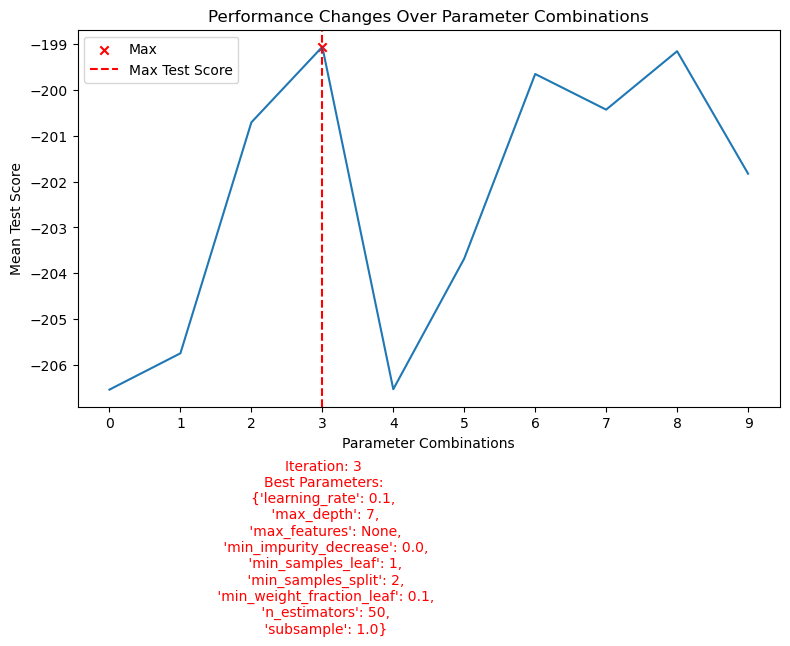

In [450]:
# Extract relevant information
results_reg = RandomizedSearchCV_object_reg.cv_results_
params_reg = results['params']
mean_scores_reg = results['mean_test_score']

# Find the index of the maximum mean test score
max_index = np.argmax(mean_scores)

# Create a line plot
plt.figure(figsize=(8,8))
plt.plot(range(len(params)), mean_scores)

# Add 'x' marker at the maximum point
plt.scatter(max_index, mean_scores[max_index], color='red', marker='x', label='Max')

# Add vertical line at the maximum point
#plt.axvline(x=max_index, linestyle='--', color='red', label='Max Iteration',clip_path=None)
line = plt.axvline(x=max_index, color='r', linestyle='--', label='Max Test Score')

# Set x-axis ticks and labels
plt.xticks(range(len(params)))

plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Performance Changes Over Parameter Combinations')

# Add a string below xlabel with the best parameter combinations using pprint
best_params_str = pprint.pformat(params[max_index])
plt.text(.35,0.-.6, f'Iteration: {max_index}\nBest Parameters:\n{best_params_str}', ha='center', 
         transform=plt.gca().transAxes, color='red')

plt.legend()
plt.tight_layout()
plt.show()

In [451]:
print("Best Parameters for GradientBoostingRegressor with hyperparameter tuning using RandomSearchCV\n")
pprint.pprint(best_params_regressor)

Best Parameters for GradientBoostingRegressor with hyperparameter tuning using RandomSearchCV

{'learning_rate': 0.15,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.05,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150,
 'subsample': 0.6}


In [452]:
# GradientBoosting Params for tuning classifier model
param_grid2 = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

##### 4.6.1.2 Gradient Boosting Classifier <a id="4.6.1.2_Gradient_Boosting_Classifier"><a/>

In [453]:
# run function that takes the model, parameter grid, 
# and other relevant parameters as arguments, and then performs hyperparameter tuning

# unpack model, params and cv object 
best_classifier_model_rscv, \
best_params_classifier, \
RandomizedSearchCV_object_cl = tune_random_cv(best_classifier_model,
                                                          param_grid2,
                                                          X_vs_sample_train,
                                                          y_vs_sample_train,
                                                          scoring="accuracy",
                                                          n_iter=10,
                                                          n_jobs=-1,
                                                          random_state=42)

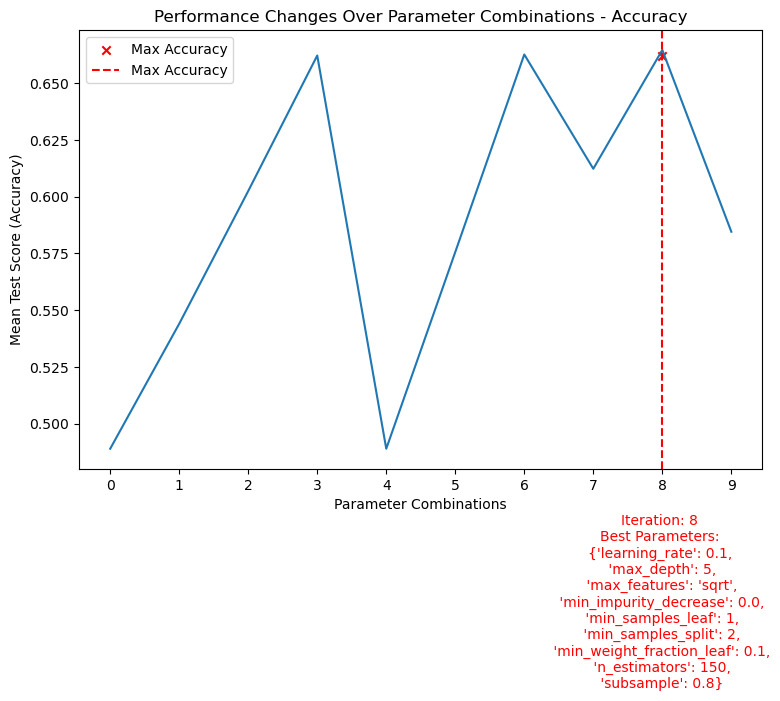

In [454]:
# Extract relevant information
results_cl = RandomizedSearchCV_object_cl.cv_results_
params_cl = results_cl['params']
mean_scores_cl = results_cl['mean_test_score']

# Find the index of the maximum mean test score
max_index_cl = np.argmax(mean_scores_cl)

# Create a line plot for accuracy
plt.figure(figsize=(8, 8))
plt.plot(range(len(params_cl)), mean_scores_cl)

# Add 'x' marker at the maximum accuracy point
plt.scatter(max_index_cl, mean_scores_cl[max_index], color='red', marker='x', label='Max Accuracy')

# Add vertical line at the maximum accuracy point
line = plt.axvline(x=max_index_cl, color='r', linestyle='--', label='Max Accuracy')

# Set x-axis ticks and labels
plt.xticks(range(len(params_cl)))
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Performance Changes Over Parameter Combinations - Accuracy')

# Add a string below xlabel with the best parameter combinations using pprint
best_params_str_cl = pprint.pformat(params_cl[max_index_cl])
plt.text(.85, -0.5, f'Iteration: {max_index_cl}\nBest Parameters:\n{best_params_str_cl}', 
         ha='center', transform=plt.gca().transAxes, color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [455]:
print("Best Parameters for GradientBoostingClassifier with hyperparameter tuning using \
RandomSearchCV\n")

pprint.pprint(best_params_classifier)

Best Parameters for GradientBoostingClassifier with hyperparameter tuning using RandomSearchCV

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 150,
 'subsample': 0.8}


#### 4.6.2 Bayesian Optimization <a id="4.6.2_Bayesian_Optimization"><a/>
    
 

Bayesian optimization will be applied to see if we get better results that RandomSearCV before moving forward and tuning the model with the full dataset.

In [456]:
# functions to optimize 

def classifier_func(learning_rate, n_estimators, subsample, max_depth, min_samples_split,
                   min_samples_leaf, min_weight_fraction_leaf, max_features, min_impurity_decrease):
    params = {
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf': int(min_samples_leaf),
        'min_weight_fraction_leaf': min_weight_fraction_leaf,
        'max_features': max_features,
        'min_impurity_decrease': min_impurity_decrease,
    }

    # Create a GradientBoostingClassifier with the specified hyperparameters
    clf = GradientBoostingClassifier(**params)
    clf.fit(X_vs_sample_train, y_vs_sample_train)
    
    y_pred = clf.predict(X_vs_sample_test)
    accuracy = accuracy_score(y_vs_sample_test, y_pred)

    return accuracy

##### 4.6.2.1 Gradient Boosting Classifier <a id="4.6.2.1_Gradient_Boosting_Classifier"><a/>

In [457]:
# Starting with GradientBoosting since this will be more straightforward than RandomForest

# Define the ranges
param_bounds = {
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 200),
    'subsample': (0.5, 1.0),
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'min_weight_fraction_leaf': (0.0, 0.5),
    'max_features': (0.1, 1.0),
    'min_impurity_decrease': (0.0, 0.2),
}

# Create the object
opt = BayesianOptimization(
    f=classifier_func, #function defined above
    pbounds=param_bounds,
    random_state=42,
)

# Run the optimization
opt.maximize(init_points=5, n_iter=10)

# get the best parameters
best_params_clf = opt.max['params']

# fit the model with the best parameters
final_clf = GradientBoostingClassifier(
    learning_rate=best_params_clf['learning_rate'],
    n_estimators=int(best_params_clf['n_estimators']),
    subsample=best_params_clf['subsample'],
    max_depth=int(best_params_clf['max_depth']),
    min_samples_split=int(best_params_clf['min_samples_split']),
    min_samples_leaf=int(best_params_clf['min_samples_leaf']),
    min_weight_fraction_leaf=best_params_clf['min_weight_fraction_leaf'],
    max_features=best_params_clf['max_features'],
    min_impurity_decrease=best_params_clf['min_impurity_decrease']
)

|   iter    |  target   | learni... | max_depth | max_fe... | min_im... | min_sa... | min_sa... | min_we... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.6738    | 0.08116   | 9.655     | 0.7588    | 0.1197    | 2.404     | 4.808     | 0.02904   | 179.9     | 0.8006    |
| 2         | 0.6681    | 0.1445    | 3.144     | 0.9729    | 0.1665    | 2.911     | 5.273     | 0.0917    | 95.64     | 0.7624    |
| 3         | 0.5997    | 0.09207   | 5.039     | 0.6507    | 0.0279    | 3.629     | 8.595     | 0.228     | 167.8     | 0.5998    |
| 4         | 0.5083    | 0.1077    | 7.147     | 0.1418    | 0.1215    | 2.535     | 3.171     | 0.4744    | 194.8     | 0.9042    |
| 5         | 0.6708    | 0.06788   | 3.684     | 0.7158    | 0.08803   | 2.098     | 10.91     | 0.01719   | 186.4     | 0.6294    |
| 6         | 0.6698    | 0.1059    | 4.758     | 0.7988    | 

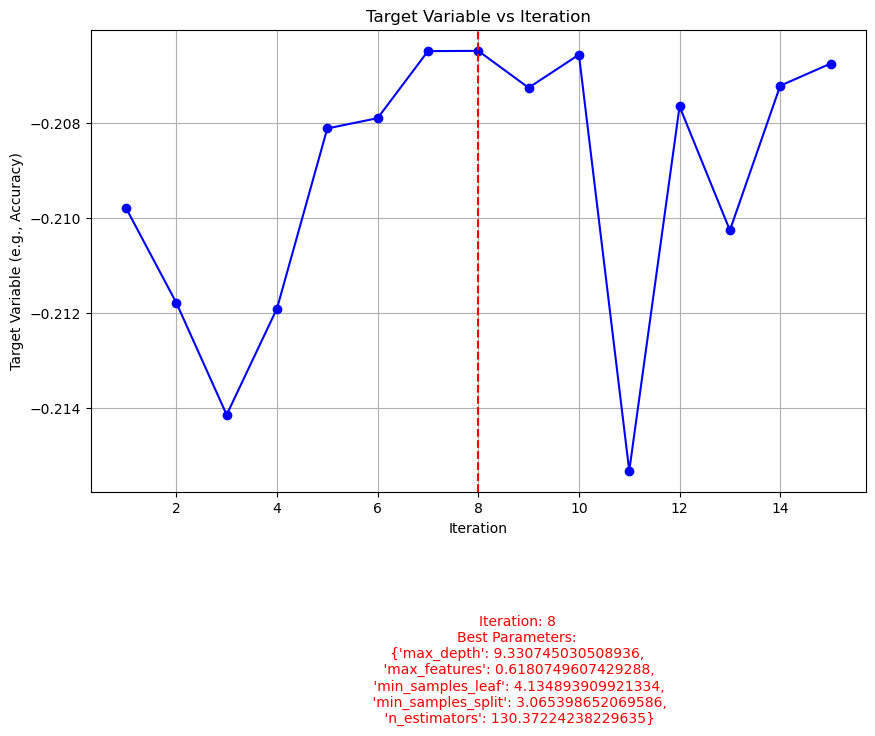

In [473]:
# Extracting target values and iteration numbers
targets = [result['target'] for result in opt.res]
iterations = range(1, len(targets) + 1)
params_cl2 = [result['params'] for result in opt.res]

max_index_cl2 = targets.index(max(targets))
# Plotting target variable against iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations, targets, marker='o', linestyle='-', color='b')
plt.title('Target Variable vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Target Variable (e.g., Accuracy)')
plt.axvline(x=max_index_cl2 + 1, color='r', linestyle='--', label='Max Target')

best_params_str_cl2 = pprint.pformat(params_cl2[max_index_cl2])
plt.text(.55, -0.5, f'Iteration: {max_index_cl2+1}\nBest Parameters:\n{best_params_str_cl2}', 
         ha='center', transform=plt.gca().transAxes, color='red')

plt.grid(True)
plt.show()


In [459]:
print("Best Parameters for GradientBoostingClassifier with hyperparameter tuning using \
BayesianOptimization\n")

pprint.pprint(best_params_clf)

Best Parameters for GradientBoostingClassifier with hyperparameter tuning using BayesianOptimization

{'learning_rate': 0.2,
 'max_depth': 9.132998322225577,
 'max_features': 1.0,
 'min_impurity_decrease': 0.2,
 'min_samples_leaf': 1.0,
 'min_samples_split': 2.0,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 101.50770387788786,
 'subsample': 1.0}


In [460]:
def regressor_func(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    params = {
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf': int(min_samples_leaf),
        'max_features': max_features,
    }

    # Create a GradientBoostingRegressor with the specified hyperparameters
    reg = GradientBoostingRegressor(**params)
    reg.fit(X_vs_sample_train, y_vs_sample_train)
    
    y_pred = reg.predict(X_vs_sample_test)
    mse = mean_squared_error(y_vs_sample_test, y_pred)

    return -mse

#### 4.6.2.2 Gradient Boosting Regressor <a id="4.6.2.2_Gradient_Boosting_Regressor"><a/>

In [461]:
# define ranges as tuples (min, max)
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0),
}

# Create the BayesianOptimization object
opt = BayesianOptimization(
    f=regressor_func,
    pbounds=param_bounds,
    random_state=42,
)

# Run the optimization
opt.maximize(init_points=5, n_iter=10)

# Retrieve the best parameters
best_params_reg = opt.max['params']

# fit the model with the best parameters
final_reg = GradientBoostingRegressor(
    n_estimators=int(best_params_reg['n_estimators']),
    max_depth=int(best_params_reg['max_depth']),
    min_samples_split=int(best_params_reg['min_samples_split']),
    min_samples_leaf=int(best_params_reg['min_samples_leaf']),
    max_features=best_params_reg['max_features'],
).fit(X_va_sample_train,y_va_sample_train)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -0.2098   | 5.622     | 0.9556    | 7.588     | 12.78     | 73.4      |
| 2         | -0.2118   | 4.092     | 0.1523    | 8.796     | 12.82     | 156.2     |
| 3         | -0.2141   | 3.144     | 0.9729    | 8.492     | 5.822     | 77.27     |
| 4         | -0.2119   | 4.284     | 0.3738    | 5.723     | 9.775     | 93.68     |
| 5         | -0.2081   | 7.283     | 0.2255    | 3.629     | 8.595     | 118.4     |
| 6         | -0.2079   | 8.138     | 0.1243    | 3.631     | 8.411     | 118.7     |
| 7         | -0.2065   | 9.387     | 0.9087    | 8.715     | 8.796     | 123.6     |
| 8         | -0.2065   | 9.331     | 0.6181    | 4.135     | 3.065     | 130.4     |
| 9         | -0.2073   | 10.0      | 0.1       | 1.804     | 16.53     | 131.5     |
| 10        | -0.2066   | 10.0      | 0.645     | 2.24

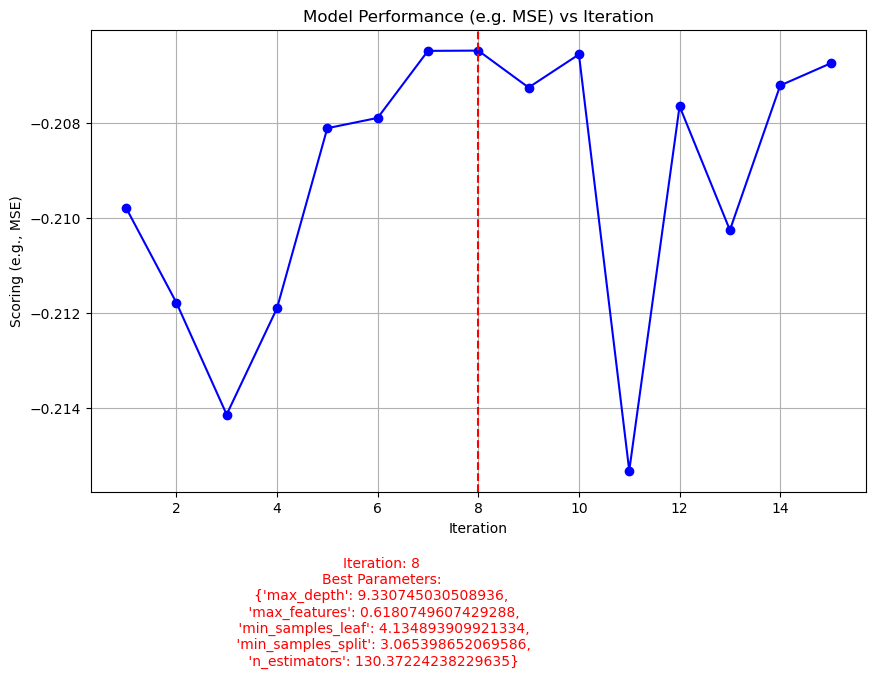

In [462]:
# Extracting target values and iteration numbers
targets_reg = [result['target'] for result in opt.res]
iterations_reg = range(1, len(targets_reg) + 1)
params_reg = [result['params'] for result in opt.res]

# Index of best params
max_index_reg = targets_reg.index(max(targets_reg))

# Plotting target variable against iteration
plt.figure(figsize=(10, 6))
plt.plot(iterations_reg, targets_reg, marker='o', linestyle='-', color='b')
plt.title('Model Performance (e.g. MSE) vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Scoring (e.g., MSE)')

plt.axvline(x=max_index_reg + 1, color='r', linestyle='--', label='Max Target')

best_params_str_reg = pprint.pformat(params_reg[max_index_reg])
plt.text(.375, -0.375, f'Iteration: {max_index_reg+1}\nBest Parameters:\n{best_params_str_reg}', 
         ha='center', transform=plt.gca().transAxes, color='red')


plt.grid(True)
plt.show()

In [463]:
print("Best Parameters for GradientBoostingRegressor with hyperparameter tuning using \
BayesianOptimization\n")

pprint.pprint(best_params_reg)

Best Parameters for GradientBoostingRegressor with hyperparameter tuning using BayesianOptimization

{'max_depth': 9.330745030508936,
 'max_features': 0.6180749607429288,
 'min_samples_leaf': 4.134893909921334,
 'min_samples_split': 3.065398652069586,
 'n_estimators': 130.37224238229635}


#### 4.6.3 Performance Comparison <a id="4.6.3_Performance_Comparison"><a/>

In [464]:
# fit the last models created before predicting

final_clf.fit(X_train_vs, y_train_vs)
final_reg.fit(X_train_va, y_train_va)

GradientBoostingRegressor(max_depth=9, max_features=0.6180749607429288,
                          min_samples_leaf=4, min_samples_split=3,
                          n_estimators=130)

In [465]:
classifiers_pipeline = [
    ("GradientBoost_clf",best_classifier_model),
    ("GradientBoost_clf with RandomSearchCV",best_classifier_model_rscv), 
    ("GradientBoost_clf with BayesianOptimization",final_clf)
]

for model_name,model in classifiers_pipeline:
    y_predicted_clf = model.predict(X_vs_sample_test)
    print(f"Accuracy for {model_name} is:", accuracy_score(y_vs_sample_test,y_predicted_clf))
    

Accuracy for GradientBoost_clf is: 0.6709968141678679
Accuracy for GradientBoost_clf with RandomSearchCV is: 0.6660254624301963
Accuracy for GradientBoost_clf with BayesianOptimization is: 0.67625888822938


In [466]:
classifiers_pipeline = [
    ("GradientBoost_reg",best_regressor_model),
    ("GradientBoost_reg with RandomSearchCV",best_regressor_model_rscv), 
    ("GradientBoost_reg with BayesianOptimization",final_reg)
]

for model_name,model in classifiers_pipeline:
    y_predicted_reg = model.predict(X_va_sample_test)
    print(f"MSE for {model_name} is:", mean_squared_error(y_va_sample_test,y_predicted_reg))
    

MSE for GradientBoost_reg is: 191.3965280777735
MSE for GradientBoost_reg with RandomSearchCV is: 187.86463081127204
MSE for GradientBoost_reg with BayesianOptimization is: 184.98259362367278


The accuracy of the classification model experienced a minor decline with RandomSearchCV but saw improvement with BayesianOptimization, resulting in a final accuracy of 0.6763

In the context of Mean Squared Error (MSE), lower values indicate better model performance. Therefore, the decrease in MSE from 191.40 to 184.98 for the regression model, as observed after BayesianOptimization, is a positive outcome. It suggests that the model's predictions are closer to the actual values, reflecting improved accuracy in the regression task

#### 4.6.4 Best Params <a id="4.6.4_Best_Params"><a/>

Best parameters determined by Bayesian Optimization. 

In [467]:

print("Best parameters for Gradient Boosting Regression Model\n")
print(best_params_reg)

print("\nBest parameters for Gradient Boosting Classifier Model\n")
print(best_params_clf)

Best parameters for Gradient Boosting Regression Model

{'max_depth': 9.330745030508936, 'max_features': 0.6180749607429288, 'min_samples_leaf': 4.134893909921334, 'min_samples_split': 3.065398652069586, 'n_estimators': 130.37224238229635}

Best parameters for Gradient Boosting Classifier Model

{'learning_rate': 0.2, 'max_depth': 9.132998322225577, 'max_features': 1.0, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1.0, 'min_samples_split': 2.0, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 101.50770387788786, 'subsample': 1.0}


### 4.7 Victims in Social Services Context <a id="4.7_Victims_in_Social_Services_Context"><a/>
     

These models have been developed for the purpose of identifying a victim's age and sex in Los Angeles based on a number of factors (ie input variables). The applications of these predictive models are numerous but my intended goal is for victim service providers to be able to use this for resource allocation, targeted community outreach, and developing strategic partnerships based on the needs of the demographic they are serving. 

For example, if there is an area where there is a high likelihood of victims of violence being female and underage, then this would be the community to target for outreach by agencies such as:
- Local Domestic Violence Shelters
- Child Advocacy Centers (CACs)
- Rape Crisis Centers
- Children's Advocacy Centers (CACs)
- Legal Aid Organizations
- Social Services Agencies
- Human Trafficking Support Organizations
- Crisis Hotlines
- School-Based Counseling Services
- Non-Governmental Organizations (NGOs)


In [468]:
# Predicting on test data

final_y_pred_va = final_reg.predict(X_test_va) 

print("MSE:", mean_squared_error(y_test_va, final_y_pred_va))
print("MAE:", mean_absolute_error(y_test_va, final_y_pred_va))

MSE: 184.98259362367278
MAE: 10.010164279756081


In [474]:
# Predicting on test data

final_y_pred_vs = final_clf.predict(X_test_vs)

print("Accuracy Score:", accuracy_score(y_test_vs, final_y_pred_vs))

Accuracy Score: 0.67625888822938


### 4.8 Modeling scenarios<a id="4.8_Modeling_scenarios"><a/>  

Lets go over a couple of scenarios where these predictive models can be useful. Note: These were drawn from my experience working in the NGO anti-trafficking space.

#### 4.8.1 Scenario 1 <a id="4.8.1_Scenario_1"><a/>


**Scenario 1**:

A nonprofit organization is planning its staffing for the upcoming year and wants to make sure they have the right team to support all clients within their service scope. The organization currently serves clients aged 5 to 26. They are considering the areas where they operate and the primary ethnicity of those areas to estimate the number of clients they might assist in the coming year. 

The goal is to understand the potential volume of clients in different age groups and ethnicities to ensure adequate staffing for effective support services. 

How can the organization use information about the areas they work in and the primary ethnicity of those areas to estimate the volume of clients they might encounter in the next year?

Let's say the agency is looking to expand services to the Latino population in Van Nuys, CA

/Users/frankyaraujo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


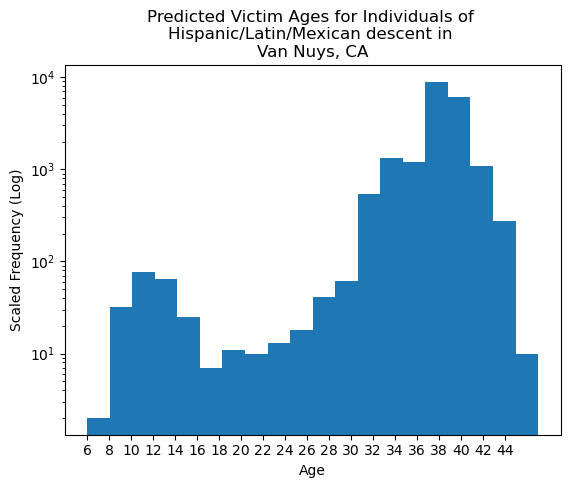

In [470]:
# A look at ages for individuals of Hispanic/Latin/Mexican descent in Van Nuys, CA
subset_scenario_1 = victim_age_feature_data_df[
    (victim_age_feature_data_df["Area Name_Van Nuys"] == True) & 
    (victim_age_feature_data_df["Victim Descent_Hispanic/Latin/Mexican"] == True)]

y_pred_scenario_1 = final_reg.predict(subset_scenario_1) 

# converted age values to int for better interpretability 
_=plt.hist([int(x) for x in y_pred_scenario_1], bins=20)
_=plt.yscale(value="log")
_=plt.title("Predicted Victim Ages for Individuals of \nHispanic/Latin/Mexican descent \
in \nVan Nuys, CA")
_=plt.ylabel("Scaled Frequency (Log)")
_=plt.xlabel("Age")
_=plt.xticks(np.arange(int(min(y_pred_scenario_1)), 45, step=2))


**Summary**:

The age distribution predictive analysis displayed on the histogram above serves as a foundational tool to guide targeted program planning. The results indicate a notable concentration of individuals aged 30-40, suggesting that services should be tailored primarily to this age group. Agencies can assess their capabilities to offer a range of services, including Counseling and Mental Health Services, Legal Assistance, Support Groups, Emergency Shelter and Housing Support, Financial Support and Advocacy, Employment and Vocational Services, Healthcare Services, Educational Support, Safety Planning, Community Resources, and Integration.

In addition, the analysis reveals clusters in the age groups 8-16 and a steady distribution between 18-26. Although the frequencies are lower, this prompts further exploration to ensure a comprehensive understanding of community needs. Notably, the identification of individuals under 20 as a distinct group underscores the importance of developing services tailored to the unique challenges faced by younger community members.

In summary, while recognizing the potential limitations in the predictive power of this model, the age distribution analysis provides valuable insights for NGO's, law enforcement, victim service providers, and government funding awards. It serves as a practical tool to enhance ongoing efforts in addressing community needs.

#### 4.8.2 Scenario 2 <a id="4.8.2_Scenario_2"><a/>


**Scenario 2**:

A nonprofit organization customizes its programs and services to meet the unique needs of its clients. The services provided to clients aged 5 to 17 significantly differ from those offered to clients aged 18 to 26, considering various factors. 

In planning for the future, the nonprofit faces decisions on allocating funding to specific programs and services during different times of year, service areas, and the types of crimes. How can the organization strategically decide on the allocation of funding to ensure effective and tailored support for clients in different age groups and genders*?

For the sake of this example, Let's say we will explore Sex Crimes (Crime Codes 800-899) in the June-December in Hollywood, CA. 

<div class="footnote">
  <hr />
  <ol>
    <li id="fn:1">
      <p>For this example, the genders are represented by the following classes: Male, Female, and Unknown. This is solely based on the available data.</p>
    </li>
  </ol>
</div>

In [482]:
victim_age_feature_csv_unscaled = '/Users/frankyaraujo/Development/springboard_main/Capstone Two/\
Springboard-Capstone-Two/src/data/interim/victim_age_feature_data_unscaled.csv'

victim_sex_feature_csv_unscaled = '/Users/frankyaraujo/Development/springboard_main/Capstone Two/\
Springboard-Capstone-Two/src/data/interim/victim_sex_feature_data_unscaled.csv'

scenario_2__va_df = pd.read_csv(victim_age_feature_csv_unscaled)
scenario_2__vs_df=pd.read_csv(victim_sex_feature_csv_unscaled)

In [489]:
# finding all sex crimes in Hollywood, between June-December within the dataset
subset_scenario_2_va = scenario_2__va_df[scenario_2__va_df["Area Name_Hollywood"] == True]
subset_scenario_2_va = subset_scenario_2_va[
    (subset_scenario_2_va["Crime Code"] > 799) & (subset_scenario_2_va["Crime Code"] < 900)]

months_to_keep = list(range(6, 13))  # June to December
subset_scenario_2_va = subset_scenario_2_va[subset_scenario_2_va["Month_Occurred"].isin(months_to_keep)]


In [490]:
# Doing the same for the feature data for prediciting sex 

subset_scenario_2_vs = scenario_2__vs_df[scenario_2__vs_df["Area Name_Hollywood"] == True]
subset_scenario_2_vs = subset_scenario_2_vs[
    (subset_scenario_2_vs["Crime Code"] > 799) & (subset_scenario_2_vs["Crime Code"] < 900)]

months_to_keep = list(range(6, 13))  # June to December
subset_scenario_2_vs = subset_scenario_2_vs[subset_scenario_2_vs["Month_Occurred"].isin(months_to_keep)]


In [491]:
# predicting age based on scenario
y_pred_va_scenario_2 = final_reg.predict(subset_scenario_2_va) 

# predicting sex based on scenario
y_pred_vs_scenario_2 = final_clf.predict(subset_scenario_2_vs) 

/Users/frankyaraujo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/Users/frankyaraujo/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


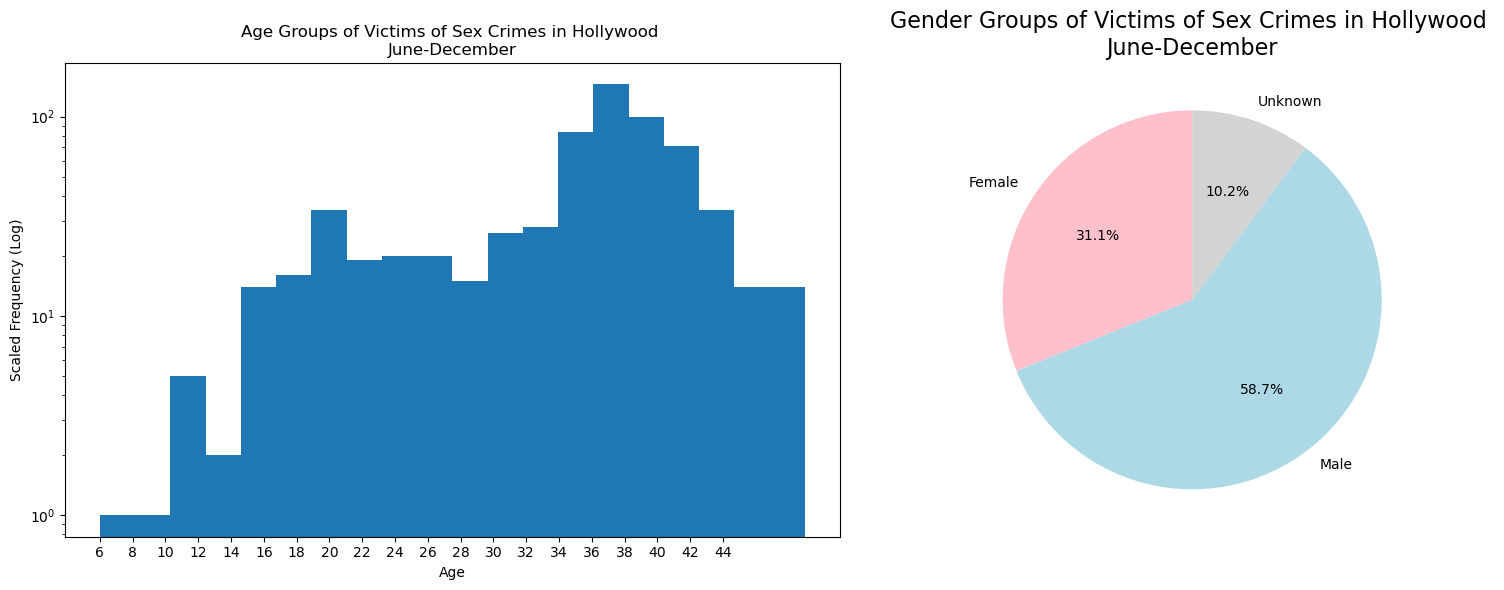

In [492]:
# Increase the figure size (width, height)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first histogram on the left subplot
axes[0].hist([int(x) for x in y_pred_va_scenario_2], bins=20)
axes[0].set_yscale(value="log")
axes[0].set_title("Age Groups of Victims of Sex Crimes in Hollywood \nJune-December")
axes[0].set_ylabel("Scaled Frequency (Log)")
axes[0].set_xlabel("Age")
axes[0].set_xticks(np.arange(int(min(y_pred_va_scenario_2)), 45, step=2))

# Create a pie chart for the second subplot
# recall from preprocessing sex_class_names = l_encoder.classes_ # 0->F, 1->M, and 2->X (Unknown)
gender_labels = ["Female", "Male", "Unknown"] 
gender_counts = [np.sum(y_pred_vs_scenario_2 == i) for i in range(len(gender_labels))]

axes[1].pie(gender_counts, labels=gender_labels, autopct="%1.1f%%", startangle=90, colors=['pink', 'lightblue', 'lightgray'])
axes[1].set_title("Gender Groups of Victims of Sex Crimes in Hollywood \nJune-December", fontsize=16)
axes[1].set_ylabel("")  # Remove y-axis label for the pie chart


# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

Examining Sex Crimes in Hollywood, CA, between June and December revealed a distribution of 31.1% female, 58.7% male, and 13% unknown victims. The age distribution analysis displayed peaks and dips, such as a slight dip between ages 26-29 and a subsequent spike between 30-38. The accompanying pie chart illustrates this gender distribution, emphasizing the importance of continually validating and refining models to ensure the reliability and accuracy of their predictions.The clustering within age groups may provide additional insights into the demographics of the area and how to best render services. 

In summary, understanding age distribution informs targeted program planning, and the predictive model highlights specific demographics and timing, contributing to the nonprofit's strategic service delivery efforts.

For reference, here are the descriptions for Crime Codes 800-899: 
- SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
- BATTERY WITH SEXUAL CONTACT
- TRESPASSING
- DISTURBING THE PEACE
- SEX, UNLAWFUL (INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)
- CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)
- SEXUAL PENETRATION W/FOREIGN OBJECT
- FAILURE TO YIELD
- INDECENT EXPOSURE
- ORAL COPULATION
- SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH
- CHILD ANNOYING (17YRS & UNDER)
- PIMPING
- HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
- CHILD PORNOGRAPHY
- PANDERING
- DISRUPT SCHOOL
- DRUGS, TO A MINOR
- CHILD ABANDONMENT
- BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM
- FAILURE TO DISPERSE
- INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)
- INCITING A RIOT


#### 4.9.3 Scenarios Closing Summaries  <a id="4.9.3_Scenarios_Summary"><a/>

The predictive models for identifying victims' age and sex in Los Angeles hold potential for enhancing resource allocation, community outreach, and strategic partnerships. Targeted towards victim service providers, these models offer insights to optimize support services.


 ___
**Scenario 1: Planning Staffing for Crime Victims of Latin Descent in Van Nuys, CA:**

In preparation for the upcoming year, a nonprofit undertook a strategic analysis to optimize staffing and support services, considering clients aged 5 to 26 and the unique demographics of their operational areas, with a focus on expanding services to the Latino population in Van Nuys, CA.

Insights:

The age distribution predictive analysis, shown in the histogram, became a guide for targeted program planning. A significant concentration in the 34-40 age group was predicted, directing the focus towards tailored services. This age demographic prompted an assessment of capabilities to provide a diverse range of services.

Additionally, the analysis uncovered clusters in the 10-20 and 21-30 age groups, necessitating further exploration for a comprehensive understanding of community needs. Identifying individuals under 20 as a distinct group emphasized the importance of tailored services for younger community members.

Impact:

While recognizing potential model limitations, the age distribution analysis serves as a valuable tool for NGOs, law enforcement, victim service providers, and government funding awards. It provides practical insights to enhance ongoing efforts in addressing community needs.

This strategic approach ensures the nonprofit is well-prepared to meet the dynamic needs of its diverse clientele, contributing to the overall welfare of the community served.
___


___
**Scenario 2: Resource Allocation for Sex Crime Victims in Hollywood, CA:**

A nonprofit organization tailors its programs to meet diverse client needs, recognizing significant distinctions between minors and adults. As the organization plans for the future, critical decisions loom regarding funding allocations for programs, considering various factors such as timing of services, service areas, and providing support to victims of specific crime types.

Delving into a focused example—Sex Crimes (Crime Codes 800-899) in Hollywood, CA, between June and December—the model predicts that only females fall victim to these crimes. The age distribution, depicted in the histogram, emphasizes peaks and dips, with a notable dip between ages 26-29 and a subsequent spike between 29-31. The accompanying pie chart reveals a gender distribution of 13% unknown, 87% female, and 0% male.

Aligning services with these insights, especially for specific age groups, emerges as a strategic move to support ongoing efforts in addressing community needs. The age distribution analysis serves as a foundation for targeted program planning, while the predictive model highlights demographics and timing. This, in turn, contributes to the nonprofit's strategic service delivery efforts, ensuring impactful and tailored support for diverse communities
___

### 4.10 Closing Summary <a id="4.10_Closing_Summary"><a/>

In this analysis, we have used predictive models to gain insights into the dynamics of victim demographics in Los Angeles. 

- The models provide a better understanding of age distribution, highlighting key demographics and age groups. Victim service providers can leverage this information to tailor their outreach efforts and allocate resources effectively. Whether planning staffing in Van Nuys or customizing programs in response to sex crimes in Hollywood, the models serve as invaluable tools for informed decision-making.

- By recognizing patterns and trends, the models empower nonprofits to forge strategic partnerships with agencies like Domestic Violence Shelters, Child Advocacy Centers, and Legal Aid Organizations. Targeted collaborations ensure a more synchronized and impactful approach to addressing the diverse needs of the community.

Through ongoing refinement and collaboration, these models can evolve to meet the ever-changing landscape of social services, ensuring a more resilient and responsive support system for victims.



### 4.11 What's next? 
<a id="4.11_Whats_next"><a/>

In moving forward, we encourage continuous collaboration among nonprofits, law enforcement, and relevant agencies to refine and adapt these models. This ongoing partnership ensures the sustained effectiveness of our support systems, fostering a more resilient and responsive approach to addressing the evolving needs of victims in our community.


**Fostering Continuous Improvement in Victim Services**

As I currently work in the victim services space, I thought I'd share what further actions I intend to take or recommend to the agency as I consider applications (and variants) of these models.

- Regularly update and enhance the predictive models by incorporating fresh data and accounting for emerging patterns. Continuous refinement ensures that the models stay adaptive to the evolving dynamics of victim demographics.

- Facilitate collaboration and data sharing among victim service providers, law enforcement, and relevant organizations. Establishing a collaborative platform can foster a collective understanding of the nuances in victim demographics, leading to more comprehensive and impactful support strategies.

- Engage directly with the communities being served. Solicit feedback, concerns, and insights from community members to ensure that support services align with their evolving needs. Community engagement is crucial for building trust and tailoring interventions for maximum effectiveness.

- Maintain a strong commitment to ethical considerations and privacy standards in handling sensitive victim data. Regularly review and update data protection protocols to ensure compliance with evolving legal and ethical standards.

- Launch public awareness campaigns to educate the community about available victim services and resources. Increased awareness fosters a proactive approach to seeking help and contributes to the overall well-being of potential victims.

By embracing these further actions, victim service providers can solidify their commitment to continuous improvement, community-centric approaches, and ethical practices in the pursuit of a safer and more resilient society.